# Proyek Analisis Data:
- **Nama:** Khaula Sayyidatundia
- **Email:** m180b4kx2210@bangkit.academy
- **ID Dicoding:** Khaula Sayyidatunadia

## Menentukan Pertanyaan Bisnis

- **Bagaimana pengaruh waktu terhadap jumlah sewa sepeda?** (by hour)
- **Bagaimana pola penggunaan sepeda selama hari kerja dibandingkan akhir pekan?** (by day)

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Insight:**
- Pertanyaan pertama menggunakan hour.csv
- Pertanyaan kedua menggunakan day.csv

In [7]:
day_data = pd.read_csv('C:\\Users\\Khaula sayyidatunadi\\Downloads\\submission\\data\\day.csv')  
hour_data = pd.read_csv('C:\\Users\\Khaula sayyidatunadi\\Downloads\\submission\\data\\hour.csv')

In [8]:
hour_data = pd.read_csv(r"./data/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
day_data = pd.read_csv(r"./data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
print(f"hours data frame in row : {hour_data.shape[0]} \nhours data frame in columns : {hour_data.shape[1]}")

hours data frame in row : 17379 
hours data frame in columns : 17


In [11]:
print(f"hours data frame in row : {day_data.shape[0]} \nhours data frame in columns : {day_data.shape[1]}")

hours data frame in row : 731 
hours data frame in columns : 16


**Insight:**
- Data  dari penyewaan sepeda hour.csv memiliki 17379 baris dan 17 kolom
- Data dari penyewaan sepeda day.csv memiliki 731 baris dan 16 kolom

### Assessing Data

In [12]:
# Cek informasi dasar dari day_data
print(day_data.info())
print(day_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [13]:
# Cek informasi dasar dari hour_data
print(hour_data.info())
print(hour_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

In [14]:
print(f"Data yang terduplikat pada hour_data : {hour_data.duplicated().sum()}")

Data yang terduplikat pada hour_data : 0


In [15]:
print(f"Data yang terduplikat pada day_data : {day_data.duplicated().sum()}")

Data yang terduplikat pada day_data : 0


In [16]:
# Mengecek apakah ada missing values
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- **day_data** memiliki beberapa kolom penting seperti season, holiday, workingday, weathersit, dan cnt yang merepresentasikan total penggunaan sepeda.
- **hour_data** memiliki detail tambahan seperti kolom hr yang memungkinkan analisis penggunaan sepeda per jam.

### Cleaning Data

In [17]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
hour_data['yr'] = hour_data['yr'].replace({0: 2011, 1: 2012})
day_data['yr'] = day_data['yr'].replace({0: 2011, 1: 2012})

In [20]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- saya mengonversi kolom dteday menjadi Tipe Datetime dengan pd.to_datatime karena akan menganalisis data berdasarkan waktu. 
- Mengubah kolom yr dari kode biner ke represetasi tahun sebenarnya agar lebih mudah dibaca

## Exploratory Data Analysis (EDA)

## Explore hour.csv

In [22]:
hour_data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
# Distribusi jumlah sewa sepeda berdasarkan jam
hourly_distribution = hour_data.groupby('hr').agg({
    'cnt': ['sum', 'mean', 'std', 'min', 'max']
})

# Menyusun ulang kolom agar rapi
hourly_distribution.columns = ['_'.join(col).strip() for col in hourly_distribution.columns.values]
hourly_distribution = hourly_distribution.reset_index()

# Menampilkan tabel distribusi jumlah sewa sepeda berdasarkan jam
print(hourly_distribution)

    hr  cnt_sum    cnt_mean     cnt_std  cnt_min  cnt_max
0    0    39130   53.898072   42.307910        2      283
1    1    24164   33.375691   33.538727        1      168
2    2    16352   22.869930   26.578642        1      132
3    3     8174   11.727403   13.239190        1       79
4    4     4428    6.352941    4.143818        1       28
5    5    14261   19.889819   13.200765        1       66
6    6    55132   76.044138   55.084348        1      213
7    7   154171  212.064649  161.441936        1      596
8    8   261001  359.011004  235.189285        5      839
9    9   159438  219.309491   93.703458       14      426
10  10   126257  173.668501  102.205413        8      539
11  11   151320  208.143054  127.495536       10      663
12  12   184414  253.315934  145.081134        3      776
13  13   184919  253.661180  148.107657       11      760
14  14   175652  240.949246  147.271574       12      750
15  15   183149  251.233196  144.632541        7      750
16  16   22774

In [24]:
# Memetakan hari kerja dan akhir pekan ke kategori
workingday_labels = {
    0: 'Akhir Pekan',
    1: 'Hari Kerja'
}
hour_data['workingday'] = hour_data['workingday'].replace(workingday_labels)

# Distribusi jumlah sewa sepeda berdasarkan jam dan hari kerja vs akhir pekan
workingday_distribution = hour_data.groupby(['workingday', 'hr']).agg({
    'cnt': ['sum', 'mean', 'std', 'min', 'max']
})

# Menyusun ulang kolom
workingday_distribution.columns = ['_'.join(col).strip() for col in workingday_distribution.columns.values]
workingday_distribution = workingday_distribution.reset_index()

# Menampilkan tabel distribusi jumlah sewa sepeda di hari kerja vs akhir pekan berdasarkan jam
print(workingday_distribution)

     workingday  hr  cnt_sum    cnt_mean     cnt_std  cnt_min  cnt_max
0   Akhir Pekan   0    20884   90.800000   48.692727        6      249
1   Akhir Pekan   1    15987   69.508696   36.549152        4      168
2   Akhir Pekan   2    12123   53.171053   27.852691        2      132
3   Akhir Pekan   3     5851   25.775330   14.893062        2       79
4   Akhir Pekan   4     1876    8.264317    5.207271        1       28
5   Akhir Pekan   5     1929    8.689189    6.698941        1       55
6   Akhir Pekan   6     4292   18.742358   16.064535        1      133
7   Akhir Pekan   7    10027   43.406926   37.794625        1      387
8   Akhir Pekan   8    24406  105.653680   74.338249        5      597
9   Akhir Pekan   9    39645  171.623377   92.515104       14      397
10  Akhir Pekan  10    59115  255.909091  127.844251       12      539
11  Akhir Pekan  11    72838  315.316017  155.250792       27      663
12  Akhir Pekan  12    84606  366.259740  174.875588       32      776
13  Ak

In [25]:
# Memetakan musim ke nama yang lebih jelas
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
hour_data['season'] = hour_data['season'].replace(season_labels)

# Distribusi jumlah sewa sepeda berdasarkan jam di setiap musim
season_distribution = hour_data.groupby(['season', 'hr']).agg({
    'cnt': ['sum', 'mean', 'std', 'min', 'max']
})

# Menyusun ulang kolom
season_distribution.columns = ['_'.join(col).strip() for col in season_distribution.columns.values]
season_distribution = season_distribution.reset_index()

# Menampilkan tabel distribusi jumlah sewa sepeda berdasarkan jam di setiap musim
print(season_distribution)

    season  hr  cnt_sum    cnt_mean     cnt_std  cnt_min  cnt_max
0     Fall   0    13822   73.914439   45.248099        8      207
1     Fall   1     8132   43.720430   37.777261        4      168
2     Fall   2     5716   30.731183   32.483223        2      122
3     Fall   3     2930   15.752688   15.648957        1       60
4     Fall   4     1541    8.240642    4.112773        1       28
..     ...  ..      ...         ...         ...      ...      ...
91  Winter  19    52575  297.033898  132.678178       28      743
92  Winter  20    37549  212.141243   93.155828       26      497
93  Winter  21    28555  161.327684   66.459189        6      360
94  Winter  22    21871  123.564972   50.331148       13      264
95  Winter  23    15300   86.440678   42.229462       13      220

[96 rows x 7 columns]


Pada ekporasi data **hour_data**
saya mencoba perbandingan distribusi sepada pada tiap jam seperti :
1.  Distribusi Jumlah Sewa Sepeda Berdasarkan Jam 
2. Distribusi Jumlah Sewa Sepeda Berdasarkan Jam di Hari Kerja vs Akhir Pekan
3. Distribusi Jumlah Sewa Berdasarkan Jam di Setiap Musim
4. Pengaruh Cuaca Berdasarkan Jam

sebagai referensi menjawab pertanyaan saya

### Explore day.csv

In [26]:
day_data.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [27]:
# Memetakan kondisi cuaca ke nama yang lebih jelas
weather_labels = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
hour_data['weathersit'] = hour_data['weathersit'].replace(weather_labels)

# Distribusi jumlah sewa sepeda berdasarkan jam dan kondisi cuaca
weather_distribution = hour_data.groupby(['weathersit', 'hr']).agg({
    'cnt': ['sum', 'mean', 'std', 'min', 'max']
})

# Menyusun ulang kolom
weather_distribution.columns = ['_'.join(col).strip() for col in weather_distribution.columns.values]
weather_distribution = weather_distribution.reset_index()

# Menampilkan tabel distribusi jumlah sewa sepeda berdasarkan jam dan kondisi cuaca
print(weather_distribution)

                weathersit  hr  cnt_sum    cnt_mean     cnt_std  cnt_min  \
0   Clear or Partly Cloudy   0    28930   59.161554   43.437921        5   
1   Clear or Partly Cloudy   1    16854   34.395918   33.554863        1   
2   Clear or Partly Cloudy   2    10907   22.817992   25.458198        1   
3   Clear or Partly Cloudy   3     5458   11.995604   12.989151        1   
4   Clear or Partly Cloudy   4     2931    6.413567    4.104137        1   
..                     ...  ..      ...         ...         ...      ...   
70                    Mist  19    45124  282.025000  138.139796       18   
71                    Mist  20    28636  204.542857  104.095513       33   
72                    Mist  21    23987  151.816456   79.329101       14   
73                    Mist  22    19159  116.823171   61.222709       10   
74                    Mist  23    14394   85.171598   48.435157        9   

    cnt_max  
0       249  
1       165  
2       132  
3        66  
4        28  
.. 

In [28]:
# Memetakan 'workingday' menjadi label yang lebih jelas
workingday_labels = {
    0: 'Akhir Pekan',
    1: 'Hari Kerja'
}

day_data['workingday'] = day_data['workingday'].replace(workingday_labels)

# Mengelompokkan data berdasarkan 'workingday' dan melakukan agregasi
result = day_data.groupby('workingday').agg({
    'cnt': ['sum', 'mean', 'std', 'min', 'max'], 
    'temp': ['mean','std','min','max'], 
    'hum': ['mean','std','min','max'], 
    'windspeed': ['mean','std','min','max']
})
# Menyusun ulang kolom untuk hasil yang lebih rapi
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result = result.reset_index()

# Mengurutkan berdasarkan total penggunaan sepeda (cnt_sum)
result.sort_values(by='cnt_sum', ascending=False, inplace=True)

# Menampilkan hasil
print(result)

    workingday  cnt_sum     cnt_mean      cnt_std  cnt_min  cnt_max  \
1   Hari Kerja  2292410  4584.820000  1878.415583       22     8362   
0  Akhir Pekan  1000269  4330.168831  2052.141245      605     8714   

   temp_mean  temp_std  temp_min  temp_max  hum_mean   hum_std   hum_min  \
1   0.501932  0.180876  0.097391  0.848333  0.630248  0.141287  0.000000   
0   0.481213  0.187285  0.059130  0.861667  0.622800  0.145050  0.187917   

    hum_max  windspeed_mean  windspeed_std  windspeed_min  windspeed_max  
1  0.972500        0.189497       0.077233       0.022392       0.441563  
0  0.948261        0.192628       0.078194       0.042304       0.507463  


**Rxplore day.csv**

**Apakah penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?**
- Dengan melihat nilai total dan rata-rata penggunaan sepeda, saya bisa memahami apakah orang lebih sering menggunakan sepeda untuk bekerja atau beraktivitas di akhir pekan.

**Apakah kondisi lingkungan (suhu, kelembapan, kecepatan angin) berperan dalam perbedaan ini?**
- Dari ekplorasi data ini saya bisa melihat apakah ada pola tertentu dalam suhu atau cuaca yang berkontribusi terhadap perbedaan penggunaan sepeda di hari kerja dan akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:**Bagaimana pengaruh waktu terhadap jumlah sewa sepeda?** (by hour)

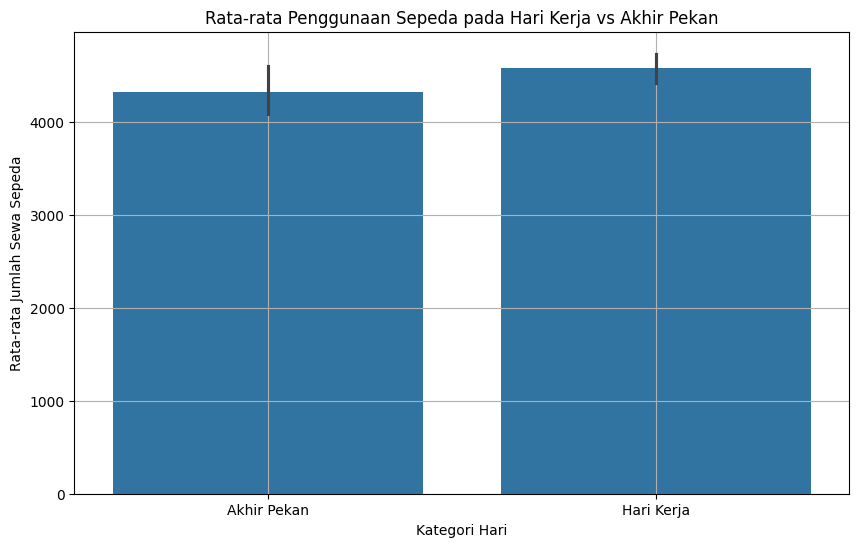

In [29]:
# Atau menggunakan barplot untuk rata-rata penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=day_data, x='workingday', y='cnt')
plt.title('Rata-rata Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.grid(True)
plt.show()

C:\Users\Khaula sayyidatunadi\AppData\Local\Temp\ipykernel_22272\536892110.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_data, x='hr', y='cnt', ci=None)


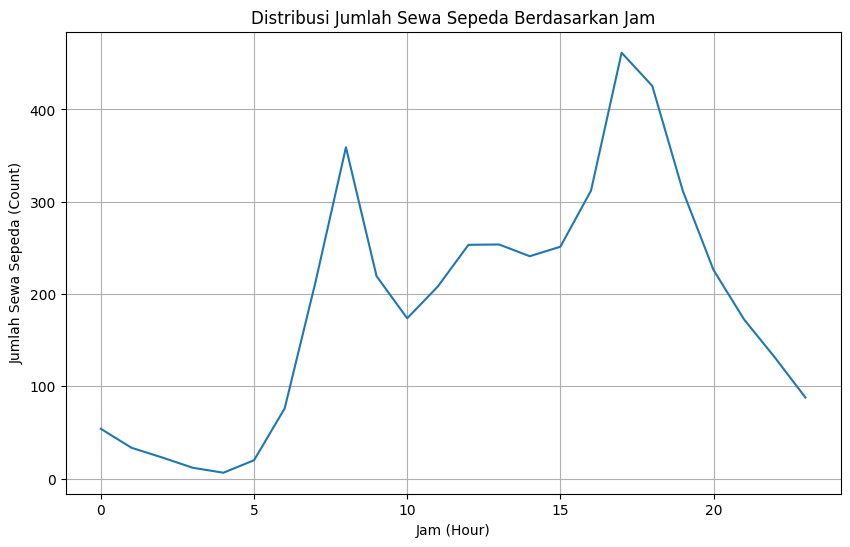

In [30]:
# Visualisasi distribusi jumlah sewa sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_data, x='hr', y='cnt', ci=None)
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Jam')
plt.xlabel('Jam (Hour)')
plt.ylabel('Jumlah Sewa Sepeda (Count)')
plt.grid(True)
plt.show()

### Pertanyaan 2:

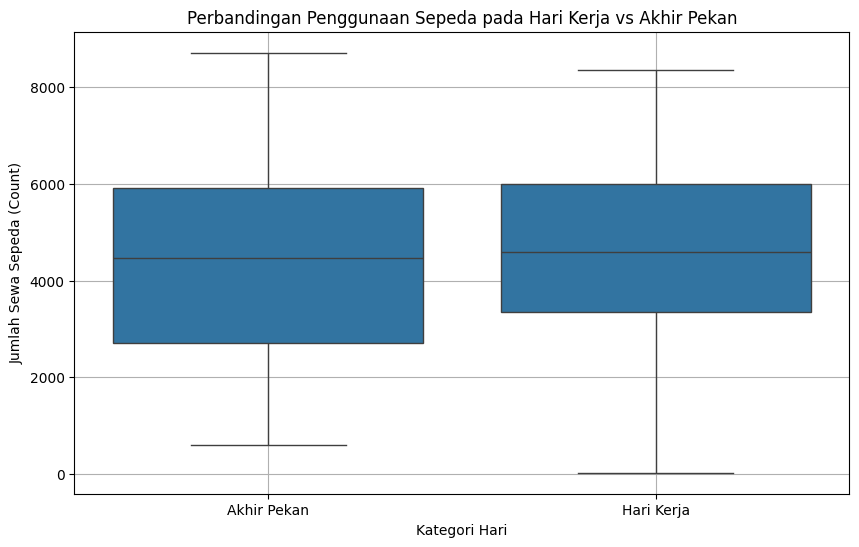

In [31]:
# Visualisasi perbandingan penggunaan sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='workingday', y='cnt')
plt.title('Perbandingan Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Sewa Sepeda (Count)')
plt.grid(True)
plt.show()

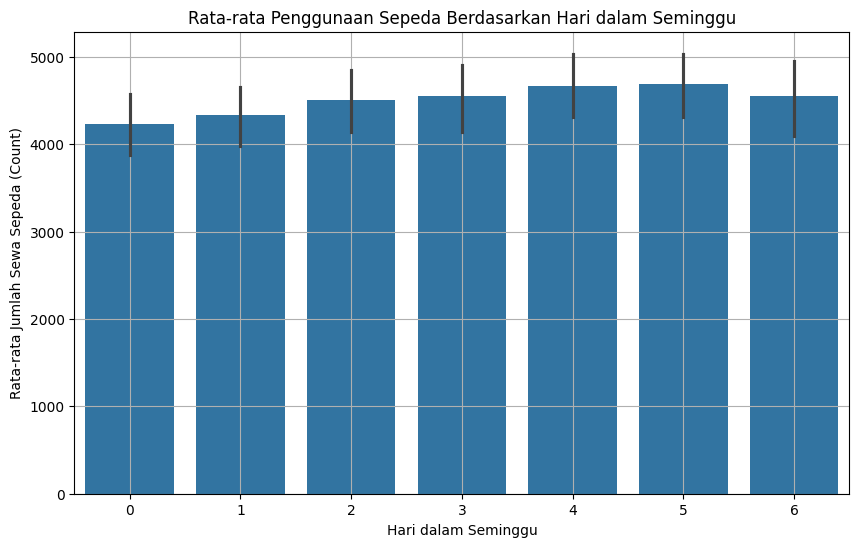

In [32]:
# Visualisasi rata-rata penggunaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(data=day_data, x='weekday', y='cnt')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda (Count)')
plt.grid(True)
plt.show()

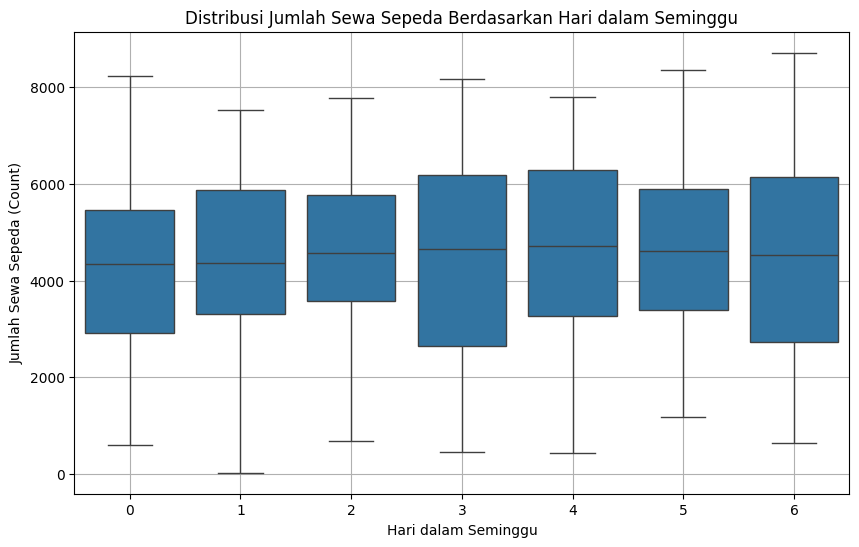

In [33]:
# Visualisasi distribusi jumlah sewa sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='weekday', y='cnt')
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Sewa Sepeda (Count)')
plt.grid(True)
plt.show()

## Conclusion

- **pertanyaan 1**
    Penggunaan sepeda terlihat mencapai **puncaknya dua kali sehari**, yaitu pada **jam 8-9 pagi** dan **jam 17-18 sore**, yang bertepatan dengan waktu jam sibuk berangkat dan pulang kerja.
    Pada malam hari **setelah jam 21** dan dini hari **sebelum jam 6**, jumlah pengguna sepeda **cenderung rendah**, menunjukkan bahwa sepeda tidak banyak digunakan pada waktu-waktu tersebut.
Kesimpulan: Sepeda banyak digunakan sebagai moda transportasi utama untuk keperluan harian, terutama saat jam-jam sibuk.


- **pertanyaan 2**
    Penggunaan sepeda **pada hari kerja cenderung lebih tinggi**, terutama pada **jam sibuk**. Ini sesuai dengan pola transportasi rutin di mana orang menggunakan sepeda untuk berangkat dan pulang kerja.
    Penggunaan sepeda **di akhir pekan lebih merata sepanjang hari**, tidak menunjukkan adanya lonjakan signifikan seperti pada hari kerja, yang menunjukkan bahwa pengguna sepeda lebih banyak menggunakan sepeda untuk aktivitas rekreasi atau santai.
    Ketika dilihat berdasarkan hari dalam seminggu, **hari kerja (Senin-Jumat) memiliki jumlah penggunaan sepeda yang lebih tinggi dibandingkan akhir pekan.**
Kesimpulan: Sepeda lebih banyak digunakan untuk aktivitas harian di hari kerja, sementara pada akhir pekan penggunaannya lebih santai dan merata.